In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyglet import display
import seaborn as sns

In [41]:
all_datasets = pd.read_excel("C:\\Users\Omkaar Sampigeadi\Downloads\\UNICEF Global database on education for children with disabilities.xlsx", sheet_name=None)

In [47]:
for key in all_datasets.keys():
    print(key)
    print()
    print(all_datasets[key].describe())
    print()

1. ANAR_Primary

       Countries and areas ISO Code Region Sub-region Development regions  \
count                  160      145    160        160                 155   
unique                  32       29      6          7                   4   
top             Bangladesh      BGD    SSA        WCA     Least Developed   
freq                     5        5     60         45                  70   

           Indicator Category  Total  Unnamed: 8  Unnamed: 9  \
count            160      160  161.0       161.0       161.0   
unique             1        5  126.0       119.0       127.0   
top     ANAR Primary    Total   96.6        98.2        95.4   
freq             160       32    5.0         4.0         3.0   

        Children without functional difficulties  Unnamed: 11  Unnamed: 12  \
count                                      160.0        160.0        160.0   
unique                                     125.0        128.0        131.0   
top                                       

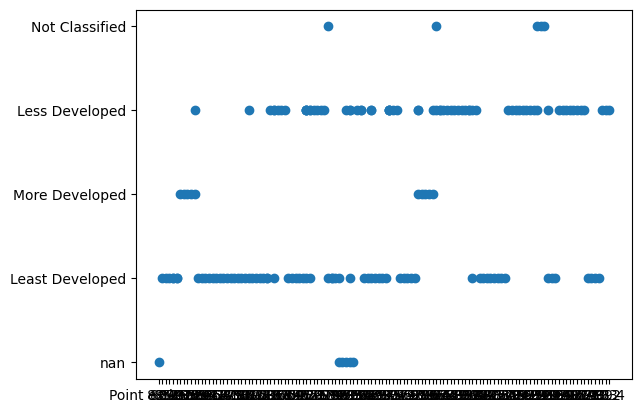

In [69]:
sample = all_datasets["1. ANAR_Primary"]
x = sample["Total"]
x_string = [str(num) for num in x]
y = sample["Development regions"]
y_string = [str(num) for num in y]
plt.scatter(x_string, y_string)
plt.show()

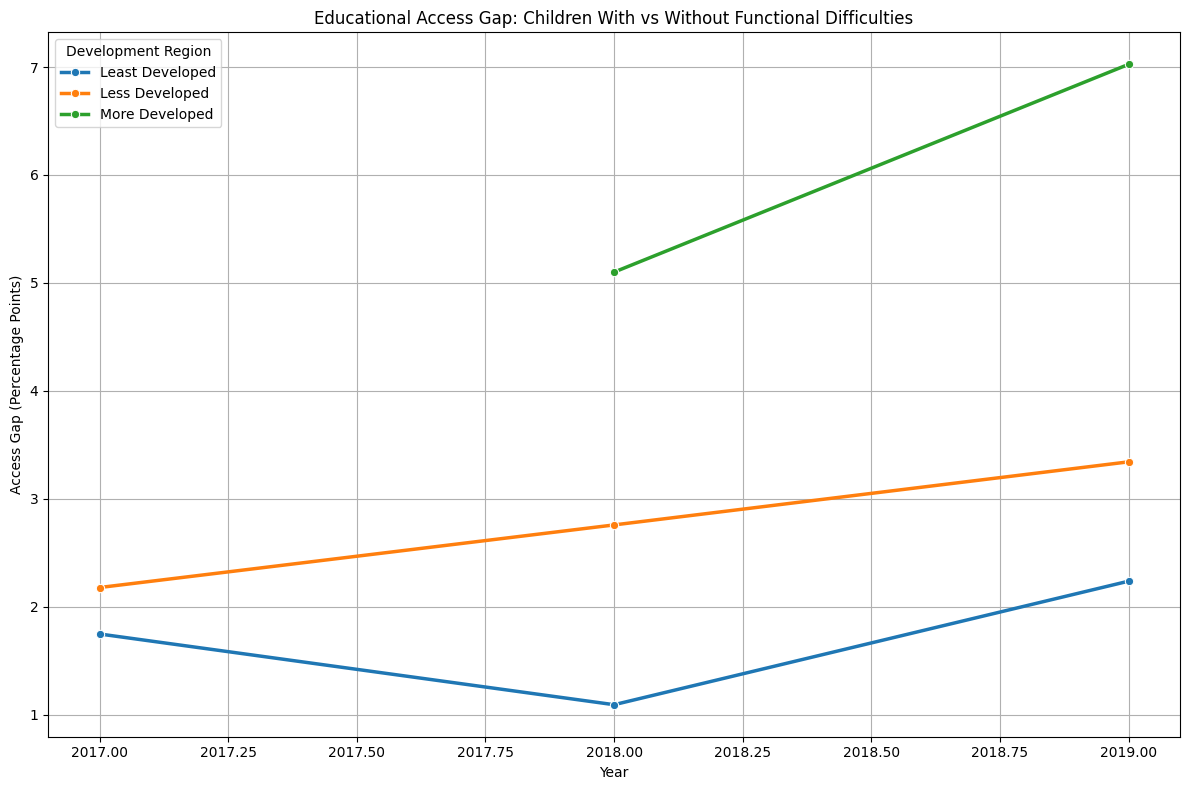


Key Insights by Development Region:
                   difference                              
                         mean       max       min      last
development_region                                         
Least Developed      1.691931  2.236471  1.092079  2.236471
Less Developed       2.759244  3.342208  2.177778  3.342208
More Developed         6.0625     7.025       5.1     7.025


In [108]:

all_data = []
for sheet_name, df in all_datasets.items():
    # Select relevant columns
    df_clean = df[['Development regions', 'Time period',
                   'Children without functional difficulties',
                   'Children with functional difficulties']].copy()
    df_clean.columns = ['development_region', 'time_period',
                        'without_difficulties', 'with_difficulties']

    # Remove rows with any NaN values
    df_clean = df_clean.dropna()

    # Convert time period to start year
    df_clean['year'] = df_clean['time_period'].astype(str).str.split('-').str[0].astype(int)
    all_data.append(df_clean)

# Combine all sheets data
combined_df = pd.concat(all_data, ignore_index=True)

# Calculate difference
combined_df['difference'] = combined_df['without_difficulties'] - combined_df['with_difficulties']

# Group by year and development region
grouped = combined_df.groupby(['year', 'development_region']).agg({
    'without_difficulties': 'mean',
    'with_difficulties': 'mean',
    'difference': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped, x='year', y='difference',
             hue='development_region', marker='o', linewidth=2.5)
plt.title('Educational Access Gap: Children With vs Without Functional Difficulties')
plt.xlabel('Year')
plt.ylabel('Access Gap (Percentage Points)')
plt.legend(title='Development Region')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display summary
key_insights = grouped.groupby('development_region').agg({
    'difference': ['mean', 'max', 'min', 'last']
})
print("\nKey Insights by Development Region:")
print(key_insights)
